In [1]:
import datetime
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import time,sys,os
from sklearn.cluster import KMeans

today = datetime.date.today()
last = today +datetime.timedelta(days=-180)

os.makedirs('./csv/'+str(today),exist_ok = True)

In [2]:
TP395 = pd.read_csv('./csv/TOPIX/Topix395.csv')
data =pd.DataFrame(TP395)
stocks = [str(s)+".T" for s in data.code]
stocks.append("^N225")
tickers = yf.Tickers(" ".join(stocks))

'''終値　毎日変わる'''
closes   = [] # 終値

for i in range(len(tickers.tickers)):
    start = time.time()
    closes.append(tickers.tickers[i].history(period="6mo").Close)
    t = time.time() - start
    print(tickers.tickers[i],t)

closes = pd.DataFrame(closes).T   # DataFrame化
closes.columns = stocks           # カラム名の設定
closes = closes.ffill()           # 欠損データの補完
closes.to_csv('./csv/'+str(today)+'/closes_' + str(today)+'_6m_395N.csv')

yfinance.Ticker object <4004.T> 0.2800009250640869
yfinance.Ticker object <4005.T> 0.15000057220458984
yfinance.Ticker object <4021.T> 0.1670234203338623
yfinance.Ticker object <4042.T> 0.13897490501403809
yfinance.Ticker object <4043.T> 0.17600083351135254
yfinance.Ticker object <4044.T> 0.16702818870544434
yfinance.Ticker object <4045.T> 0.3484365940093994
yfinance.Ticker object <4061.T> 0.1838843822479248
yfinance.Ticker object <4062.T> 0.32700014114379883
yfinance.Ticker object <4063.T> 0.6906914710998535
yfinance.Ticker object <4088.T> 0.1589982509613037
yfinance.Ticker object <4091.T> 0.16700053215026855
yfinance.Ticker object <4095.T> 0.16300106048583984
yfinance.Ticker object <4114.T> 0.17129230499267578
yfinance.Ticker object <4118.T> 0.1729738712310791
yfinance.Ticker object <4151.T> 0.17902612686157227
yfinance.Ticker object <4182.T> 0.17762994766235352
yfinance.Ticker object <4183.T> 0.16625046730041504
yfinance.Ticker object <4185.T> 0.1801929473876953
yfinance.Ticker obje

yfinance.Ticker object <6702.T> 0.16602754592895508
yfinance.Ticker object <6703.T> 0.18021678924560547
yfinance.Ticker object <6723.T> 0.14299869537353516
yfinance.Ticker object <6724.T> 0.1624293327331543
yfinance.Ticker object <6728.T> 0.1669769287109375
yfinance.Ticker object <6752.T> 0.1809999942779541
yfinance.Ticker object <6753.T> 0.20799851417541504
yfinance.Ticker object <6754.T> 0.17500019073486328
yfinance.Ticker object <6755.T> 0.16368484497070312
yfinance.Ticker object <6758.T> 0.17400050163269043
yfinance.Ticker object <6762.T> 0.17400240898132324
yfinance.Ticker object <6770.T> 0.18068718910217285
yfinance.Ticker object <6806.T> 0.16303229331970215
yfinance.Ticker object <6841.T> 0.17909741401672363
yfinance.Ticker object <6845.T> 0.16700124740600586
yfinance.Ticker object <6849.T> 0.17599797248840332
yfinance.Ticker object <6856.T> 0.16402554512023926
yfinance.Ticker object <6857.T> 0.16500043869018555
yfinance.Ticker object <6861.T> 0.16538500785827637
yfinance.Ticker

yfinance.Ticker object <8801.T> 0.17702722549438477
yfinance.Ticker object <8802.T> 0.17867755889892578
yfinance.Ticker object <8804.T> 0.19501185417175293
yfinance.Ticker object <8830.T> 0.1830458641052246
yfinance.Ticker object <8876.T> 0.1620044708251953
yfinance.Ticker object <8905.T> 0.15796899795532227
yfinance.Ticker object <9001.T> 0.16700029373168945
yfinance.Ticker object <9003.T> 0.1550002098083496
yfinance.Ticker object <9005.T> 0.1693267822265625
yfinance.Ticker object <9006.T> 0.17399883270263672
yfinance.Ticker object <9007.T> 0.1820063591003418
yfinance.Ticker object <9008.T> 0.17800545692443848
yfinance.Ticker object <9009.T> 0.1659703254699707
yfinance.Ticker object <9020.T> 0.18148517608642578
yfinance.Ticker object <9021.T> 0.14700675010681152
yfinance.Ticker object <9022.T> 0.17797589302062988
yfinance.Ticker object <9024.T> 0.15402841567993164
yfinance.Ticker object <9031.T> 0.1841113567352295
yfinance.Ticker object <9041.T> 0.176253080368042
yfinance.Ticker objec

In [3]:
TP395 = pd.read_csv('./csv/TOPIX/Topix395.csv')
data =pd.DataFrame(TP395)

stocks = [str(s)+".T" for s in data.code]
stocks.append("^N225")
tickers = yf.Tickers(" ".join(stocks))

closes= pd.read_csv('./csv/'+str(today)+'/closes_' + str(today)+'_6m_395N.csv')
closes['Date'] = pd.to_datetime(closes['Date'])
closes.set_index('Date',inplace=True)

earnings = pd.read_csv('./csv/TOPIX/earnings_395N.csv')
earnings.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
earnings['Date'] = pd.to_datetime(earnings['Date'])
earnings.set_index('Date',inplace=True)

shares= pd.read_csv('./csv/TOPIX/shares_395N.csv') 
shares.rename(columns={'Unnamed: 0':'stocks'},inplace=True)
shares.set_index('stocks',inplace=True)
shares = shares['0']

equity=pd.read_csv('./csv/TOPIX/equity_395N.csv')

equity.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
equity['Date'] = pd.to_datetime(equity['Date'])
equity.set_index('Date',inplace=True)

eps=pd.read_csv('./csv/TOPIX/eps_395.csv')
eps.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
eps['Date'] = pd.to_datetime(eps['Date'])
eps.set_index('Date',inplace=True)

roe=pd.read_csv('./csv/TOPIX/roe_395.csv')
roe.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
roe['Date'] = pd.to_datetime(roe['Date'])
roe.set_index('Date',inplace=True)


In [4]:
closes

,4004.T,4005.T,4021.T,4042.T,4043.T,4044.T,4045.T,4061.T,4062.T,4063.T,...,9783.T,9831.T,9832.T,9843.T,9861.T,9962.T,9983.T,9984.T,9987.T,^N225
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-25,2369.115479,315.752045,4468.386719,1407.706055,2415.606689,1896.065430,988.873230,2559.383545,2896.742920,11930.315430,...,3201.242920,511.0,1275.471802,18373.625000,2442.023438,2743.260498,54423.003906,4607.0,3654.148926,20741.650391
2020-05-26,2468.641846,327.555847,4602.289551,1441.175903,2473.825928,1935.402832,1009.577454,2585.890381,2965.452148,12431.338867,...,2860.305420,513.0,1295.049316,18652.919922,2451.974609,2810.145020,56564.855469,4805.0,3639.274414,21271.169922
2020-05-27,2504.744629,339.359680,4562.614746,1485.474365,2563.621826,2020.961792,1029.295776,2662.465820,2929.603760,12431.338867,...,2895.985107,523.0,1331.267578,18912.265625,2436.052734,2835.101807,56784.023438,4734.0,3753.311768,21419.230469
2020-05-28,2539.871338,350.179840,4622.126953,1490.396484,2537.965820,2038.663696,1029.295776,2653.630127,2876.827148,12629.763672,...,2883.100830,524.0,1322.457764,19306.271484,2457.945312,2924.946533,58886.027344,4827.0,3822.725586,21916.310547
2020-05-29,2512.550537,328.539520,4716.354980,1474.645874,2541.913086,1931.469116,1016.478882,2590.799072,2839.983154,12520.629883,...,2891.029541,524.0,1294.070435,19485.818359,2458.940430,2857.063965,60300.648438,4832.0,3882.223389,21877.890625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-18,1976.000000,375.000000,6310.000000,1698.000000,2244.000000,2242.000000,1162.000000,3265.000000,4370.000000,15140.000000,...,2322.000000,488.0,1336.000000,20590.000000,2000.000000,3300.000000,85200.000000,6639.0,3795.000000,25728.140625
2020-11-19,1940.000000,381.000000,6350.000000,1708.000000,2208.000000,2254.000000,1175.000000,3220.000000,4320.000000,15065.000000,...,2308.000000,490.0,1338.000000,21135.000000,1940.000000,3300.000000,83250.000000,6577.0,3895.000000,25634.339844
2020-11-20,1928.000000,385.000000,6300.000000,1696.000000,2227.000000,2281.000000,1182.000000,3215.000000,4415.000000,15160.000000,...,2308.000000,493.0,1335.000000,21085.000000,1948.000000,3255.000000,81130.000000,6749.0,3935.000000,25527.369141


In [38]:
latest_closes = closes.iloc[-1]
latest_eps = eps.iloc[-1]
PE = latest_closes / latest_eps
PE= pd.DataFrame(PE)
PE['stocks'] =PE.index
PE.columns = ['PE','stocks'] 

,PE,stocks
4004.T,3.993759,4004.T
4005.T,20.512838,4005.T
4021.T,30.053839,4021.T
4042.T,9.852055,4042.T
4043.T,7.998791,4043.T
...,...,...
9861.T,175.527789,9861.T
9962.T,57.371738,9962.T
9983.T,94.018881,9983.T
9984.T,-13.354782,9984.T


In [6]:
closes["month"] = closes.index.month                              # 月カラムの作成
closes["end_of_month"] = closes.month.diff().shift(-1)            # 月末フラグカラムの作成
closes = closes[closes.end_of_month != 0]                         # 月末のみ抽出

monthly_rt = closes.pct_change().shift(-1)                        # 月次リターンの作成(ラグあり)
monthly_rt = monthly_rt.sub(monthly_rt["^N225"], axis=0)          # マーケットリターン控除

closes = closes[closes.index > str(last)]     # 6m
monthly_rt = monthly_rt[monthly_rt.index > str(last)]

closes = closes.drop(["^N225", "month", "end_of_month"], axis=1)  # 不要なカラムを削除
monthly_rt = monthly_rt.drop(["^N225", "month", "end_of_month"], axis=1)

eps_df = pd.DataFrame(index=monthly_rt.index, columns=monthly_rt.columns) # 月次リターンと同次元のDF作成
roe_df = pd.DataFrame(index=monthly_rt.index, columns=monthly_rt.columns)

for i in range(len(eps_df)):                                              # 各行への代入
    eps_df.iloc[i] = eps[eps.index < eps_df.index[i]].iloc[-1]

for i in range(len(roe_df)):
    roe_df.iloc[i] = roe[roe.index < roe_df.index[i]].iloc[-1]

per_df = closes/eps_df                                                    # PERデータフレームの作成

stack_monthly_rt = monthly_rt.stack()                                  # 1次元にスタック
stack_per_df = per_df.stack()
stack_roe_df = roe_df.stack()

df = pd.concat([stack_monthly_rt, stack_per_df, stack_roe_df], axis=1) # 結合
df.columns = ["rt", "per", "roe"]# カラム名の設定


df["rt"][df.rt > 1.0] = np.nan         
df.to_csv('./csv/'+str(today)+'/df_' + str(today)+'_6m_395N.csv')

C:\Users\kmtk49\Anaconda3\envs\TF2-GPU\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
df = pd.read_csv('./csv/'+str(today)+'/df_' + str(today)+'_6m_395N.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.rename(columns={'Unnamed: 1':'stocks'})
df = df.groupby(['Date','stocks']).mean()

In [8]:
value_df = df[(df.per < 10) & (df.roe > 0.1)]
#value_df = df
df1 =pd.pivot_table(value_df, index='stocks',columns='Date',values='rt')
df1=df1.fillna(0)
kmean_model = KMeans(n_clusters=10,random_state=0).fit(df1)
labels = kmean_model.labels_
df1['label'] = labels
kmean_list = df1.iloc[:,-1]

In [9]:
df2 = df1.groupby(['label','stocks']).mean()
df2 = df2.stack()
df2 = pd.DataFrame(df2)

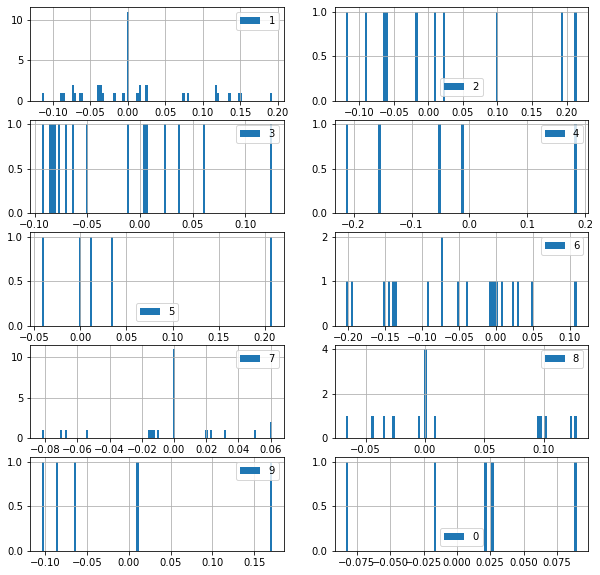

In [10]:
plt.figure(figsize=(10,10))

ax1 = plt.subplot(5,2,1)
ax2 = plt.subplot(5,2,2)
ax3 = plt.subplot(5,2,3)
ax4 = plt.subplot(5,2,4)
ax5 = plt.subplot(5,2,5)
ax6 = plt.subplot(5,2,6)
ax7 = plt.subplot(5,2,7)
ax8 = plt.subplot(5,2,8)
ax9 = plt.subplot(5,2,9)
ax0 = plt.subplot(5,2,10)
ax0.hist(df2.query('label == 0'),bins=100)
ax0.legend('0')

ax1.hist(df2.query('label == 1'),bins=100)
ax1.legend('1')

ax2.hist(df2.query('label == 2'),bins=100)
ax2.legend('2')
ax3.hist(df2.query('label == 3'),bins=100)
ax3.legend('3')
ax4.hist(df2.query('label == 4'),bins=100)
ax4.legend('4')
ax5.hist(df2.query('label == 5'),bins=100)
ax5.legend('5')
ax6.hist(df2.query('label == 6'),bins=100)
ax6.legend('6')
ax7.hist(df2.query('label == 7'),bins=100)
ax7.legend('7')
ax8.hist(df2.query('label == 8'),bins=100)
ax8.legend('8')
ax9.hist(df2.query('label == 9'),bins=100)
ax9.legend('9')

ax0.grid()
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()
ax7.grid()
ax8.grid()
ax9.grid()

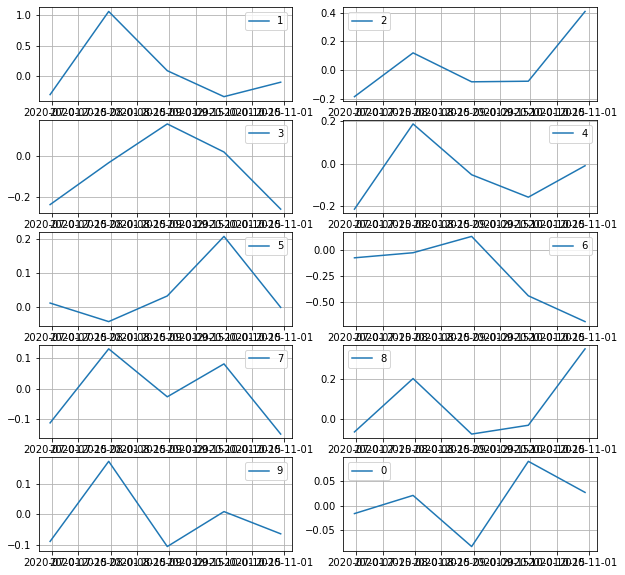

In [11]:
plt.figure(figsize=(10,10))

ax1 = plt.subplot(5,2,1)
ax2 = plt.subplot(5,2,2)
ax3 = plt.subplot(5,2,3)
ax4 = plt.subplot(5,2,4)
ax5 = plt.subplot(5,2,5)
ax6 = plt.subplot(5,2,6)
ax7 = plt.subplot(5,2,7)
ax8 = plt.subplot(5,2,8)
ax9 = plt.subplot(5,2,9)
ax0 = plt.subplot(5,2,10)

df0 = df2.query('label == 0')
df00 =df0.groupby('Date').sum()
ax0.plot(df00)

df1 = df2.query('label == 1')
df11 =df1.groupby('Date').sum()
ax1.plot(df11)

df22 = df2.query('label == 2')
df222 =df22.groupby('Date').sum()
ax2.plot(df222)

df3 = df2.query('label == 3')
df33 =df3.groupby('Date').sum()
ax3.plot(df33)

df4 = df2.query('label == 4')
df44 =df4.groupby('Date').sum()
ax4.plot(df44)

df5 = df2.query('label == 5')
df55 =df5.groupby('Date').sum()
ax5.plot(df55)

df6 = df2.query('label == 6')
df66 =df6.groupby('Date').sum()
ax6.plot(df66)

df7 = df2.query('label == 7')
df77 =df7.groupby('Date').sum()
ax7.plot(df77)

df8 = df2.query('label == 8')
df88 =df8.groupby('Date').sum()
ax8.plot(df88)

df9 = df2.query('label == 9')
df99 =df9.groupby('Date').sum()
ax9.plot(df99)

ax0.legend('0')
ax1.legend('1')
ax2.legend('2')
ax3.legend('3')
ax4.legend('4')
ax5.legend('5')
ax6.legend('6')
ax7.legend('7')
ax8.legend('8')
ax9.legend('9')

ax0.grid()
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()
ax7.grid()
ax8.grid()
ax9.grid()

In [12]:
TP500= pd.read_csv('./csv/TOPIX/TOPIX500.csv')
TP500.rename(columns={'コード':'code'},inplace=True)

In [13]:
TP500['stocks'] = [str(s)+".T" for s in TP500.code]

In [25]:
tp_kmean = pd.merge(TP500,kmean_list,on='stocks')
tp_kmean = pd.merge(PE,tp_kmean,on='stocks') # P/E 40以下が

In [26]:
tp_kmean.query('label == 0')

,0,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,調整係数対象銘柄,label
11,11.629457,6752.T,20200930,パナソニック,6752,電気機器,0.45%,TOPIX Large70,NaN,0


In [27]:
tp_kmean.query('label == 1')

,0,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,調整係数対象銘柄,label
3,11.254072,5105.T,20200930,ＴＯＹＯ ＴＩＲＥ,5105,ゴム製品,0.04%,TOPIX Mid400,NaN,1
6,13.028149,5929.T,20200930,三和ＨＤ,5929,金属製品,0.05%,TOPIX Mid400,NaN,1
7,10.848877,6141.T,20200930,ＤＭＧ森精機,6141,機械,0.04%,TOPIX Mid400,NaN,1
15,8.369738,8001.T,20200930,伊藤忠,8001,卸売業,0.81%,TOPIX Large70,NaN,1
17,8.013553,8031.T,20200930,三井物産,8031,卸売業,0.67%,TOPIX Core30,NaN,1
18,6.891416,8058.T,20200930,三菱商事,8058,卸売業,0.71%,TOPIX Core30,NaN,1
20,3.420226,8354.T,20200930,ふくおか,8354,銀行業,0.06%,TOPIX Mid400,NaN,1
25,9.777084,9065.T,20200930,山九,9065,陸運業,0.05%,TOPIX Mid400,NaN,1


In [28]:
tp_kmean.query('label == 2')

,0,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,調整係数対象銘柄,label
13,9.296973,7272.T,20200930,ヤマハ発,7272,輸送用機器,0.09%,TOPIX Mid400,NaN,2
22,6.704382,8591.T,20200930,オリックス,8591,その他金融業,0.35%,TOPIX Large70,NaN,2


In [29]:
tp_kmean.query('label == 3')

,0,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,調整係数対象銘柄,label
5,8.394473,5301.T,20200930,東海カーボ,5301,ガラス・土石製品,0.05%,TOPIX Mid400,NaN,3
14,9.135254,7846.T,20200930,パイロット,7846,その他製品,0.02%,TOPIX Mid400,NaN,3
27,5.529626,9504.T,20200930,中国電力,9504,電気・ガス業,0.08%,TOPIX Mid400,NaN,3


In [30]:
tp_kmean.query('label == 4')

,0,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,調整係数対象銘柄,label
24,7.042271,9022.T,20200930,ＪＲ東海,9022,陸運業,0.55%,TOPIX Core30,NaN,4


In [31]:
tp_kmean.query('label == 5')

,0,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,調整係数対象銘柄,label
19,12.80859,8088.T,20200930,岩谷産,8088,卸売業,0.04%,TOPIX Mid400,NaN,5


In [32]:
tp_kmean.query('label == 6')

,0,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,調整係数対象銘柄,label
0,7.998791,4043.T,20200930,トクヤマ,4043,化学,0.03%,TOPIX Mid400,NaN,6
1,7.655294,4521.T,20200930,科研薬,4521,医薬品,0.04%,TOPIX Mid400,NaN,6
9,5.632955,6703.T,20200930,ＯＫＩ,6703,電気機器,0.02%,TOPIX Mid400,NaN,6
28,3.114832,9509.T,20200930,北海電力,9509,電気・ガス業,0.02%,TOPIX Mid400,NaN,6


In [33]:
tp_kmean.query('label == 7')

,0,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,調整係数対象銘柄,label
4,8.587396,5108.T,20200930,ブリヂス,5108,ゴム製品,0.39%,TOPIX Large70,NaN,7
10,18.589458,6728.T,20200930,アルバック,6728,電気機器,0.03%,TOPIX Mid400,NaN,7
12,9.872532,7203.T,20200930,トヨタ自,7203,輸送用機器,3.40%,TOPIX Core30,NaN,7
21,13.563268,8572.T,20200930,アコム,8572,その他金融業,0.04%,TOPIX Mid400,NaN,7
26,10.544667,9433.T,20200930,ＫＤＤＩ,9433,情報・通信業,0.83%,TOPIX Core30,NaN,7


In [34]:
tp_kmean.query('label == 8')


,0,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,調整係数対象銘柄,label
8,10.489526,6448.T,20200930,ブラザー,6448,電気機器,0.09%,TOPIX Mid400,NaN,8
16,9.539124,8015.T,20200930,豊田通商,8015,卸売業,0.14%,TOPIX Mid400,NaN,8
23,11.915979,8830.T,20200930,住友不,8830,不動産業,0.30%,TOPIX Large70,NaN,8


In [35]:
tp_kmean.query('label == 9')

,0,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,調整係数対象銘柄,label
2,6.16244,5101.T,20200930,浜ゴム,5101,ゴム製品,0.04%,TOPIX Mid400,NaN,9


In [36]:
time.time() - start

282.860080242157